creates a chart which shows how MAE/RMSE differs with different context lengths for each model

In [53]:
import pandas as pd
from pyprojroot import here
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error

from nutils import name_mask, colordict

In [19]:
def root_mean_squared_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)
def flatten(matrix):
    return matrix.values.flatten()

In [3]:
TARGET = 'occ'
FS = 'u'

In [ ]:
true_matrix = pd.read_csv(
    here() / f'data/processed/true_matrices/{TARGET}.csv',
    index_col='datetime',
    parse_dates=True
)

,t+1,t+2,t+3,t+4,t+5,t+6,t+7,t+8,t+9,t+10,...,t+15,t+16,t+17,t+18,t+19,t+20,t+21,t+22,t+23,t+24
datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01,30.0,27.0,19.0,24.0,24.0,26.0,35.0,37.0,36.0,38.0,...,89.0,100.0,99.0,97.0,90.0,90.0,82.0,75.0,67.0,59.0
2017-01-02,51.0,48.0,43.0,34.0,27.0,28.0,35.0,31.0,38.0,43.0,...,94.0,100.0,98.0,99.0,99.0,96.0,98.0,93.0,93.0,83.0
2017-01-03,75.0,67.0,65.0,59.0,57.0,53.0,50.0,46.0,44.0,45.0,...,97.0,98.0,89.0,95.0,85.0,69.0,55.0,47.0,44.0,39.0
2017-01-04,36.0,27.0,24.0,23.0,20.0,15.0,11.0,19.0,23.0,26.0,...,54.0,62.0,63.0,64.0,53.0,44.0,37.0,37.0,30.0,26.0
2017-01-05,26.0,21.0,19.0,16.0,14.0,14.0,24.0,22.0,21.0,25.0,...,73.0,72.0,79.0,77.0,79.0,74.0,75.0,63.0,49.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-15,37.0,31.0,25.0,21.0,23.0,22.0,22.0,26.0,30.0,40.0,...,61.0,61.0,53.0,45.0,46.0,45.0,56.0,43.0,40.0,39.0
2019-06-16,34.0,27.0,29.0,23.0,25.0,25.0,20.0,19.0,19.0,18.0,...,58.0,56.0,63.0,67.0,64.0,62.0,56.0,53.0,45.0,35.0
2019-06-17,27.0,24.0,13.0,9.0,7.0,7.0,13.0,17.0,21.0,32.0,...,56.0,61.0,57.0,53.0,50.0,50.0,37.0,32.0,31.0,24.0


In [93]:
data_path = Path('data/processed/prediction_matrices/')

x_values = set()
for p in here(data_path / '50').glob(f'*-{FS}-*.csv'):
    parts = p.stem.split('-')
    model = parts[1]
    contextlength = parts[3]
    x_values.add(contextlength)

x_values = sorted(x_values, key=int)
x_len = len(x_values)

results = {'x': x_values, 'tirex':np.zeros(x_len), 'sundial':np.zeros(x_len), 
        'chronos':np.zeros(x_len), 'moirai2':np.zeros(x_len), 'timesfm':np.zeros(x_len)}

for p in here(data_path / '50').glob(f'*-{FS}-*.csv'):

    parts = p.stem.split('-')
    model = parts[1]
    contextlength = parts[3]

    pred_matrix = pd.read_csv(
        p, 
        index_col='datetime', 
        parse_dates=True)

    idx = pred_matrix.dropna().index.intersection(true_matrix.dropna().index)

    pred_matrix = pred_matrix.loc[idx]
    true_matrix = true_matrix.loc[idx]

    pred_vector = pred_matrix.to_numpy().ravel()
    true_vector = true_matrix.to_numpy().ravel()

    rmse = root_mean_squared_error(pred_vector, true_vector)
    
    results[model][x_values.index(contextlength)] = rmse



In [50]:
print(results['chronos'])
print(results['tirex'])
print(results['sundial'])
print(results['moirai2'])
print(results['timesfm'])
print(results['x'])


[14.43495879 10.61474473  9.32037775  9.21123168  8.58244162  8.2349359
  7.92686928  7.83804945  7.69626259  7.48092949  7.49492445  7.39278503
  7.39751717  7.37023237  7.35644345  7.25889309  7.33111607  7.26611264
  7.33649267  7.33566392  7.29381754  0.          0.          0.
  0.          0.          0.        ]
[22.54876145 11.38739812  9.74661172  9.29510073  8.73308837  8.10986149
  7.99338713  8.00271062  7.74195055  7.61213255  7.58530678  7.44495879
  7.39019918  7.4224565   7.29502976  7.17813988  7.16314789  7.13252289
  7.11513049  7.12091461  7.04782509  6.7441369   6.50928228  0.
  6.50928228  6.50928228  6.50928228]
[18.90940591 14.0002152   9.56339973  9.34659455  8.6307429   7.71776557
  7.68623397  7.55292926  7.42462454  7.05674908  7.06557692  7.01637477
  6.89959707  6.97450549  6.82046703  6.754644    6.84576809  6.78347871
  6.78051168  6.73746451  6.68771864  6.59837111  6.57385989  6.55795101
  0.          0.          0.        ]
[15.20599359 13.06879235 17

In [94]:
df = pd.DataFrame(results)

df = df.loc[df["x"] != '2880']

In [86]:
df

,x,tirex,sundial,chronos,moirai2,timesfm
0,8,22.548761,18.909406,14.434959,15.205994,17.591969
1,16,11.387398,14.000215,10.614745,13.068792,12.819501
2,24,9.746612,9.563400,9.320378,17.477960,10.708869
3,32,9.295101,9.346595,9.211232,5.083168,10.039586
4,48,8.733088,8.630743,8.582442,3.995412,8.914261
5,72,8.109861,7.717766,8.234936,6.343190,8.088781
6,96,7.993387,7.686234,7.926869,4.579675,7.936973
7,120,8.002711,7.552929,7.838049,5.998854,7.899435
8,144,7.741951,7.424625,7.696263,4.794976,7.602970
9,168,7.612133,7.056749,7.480929,5.449991,7.225946


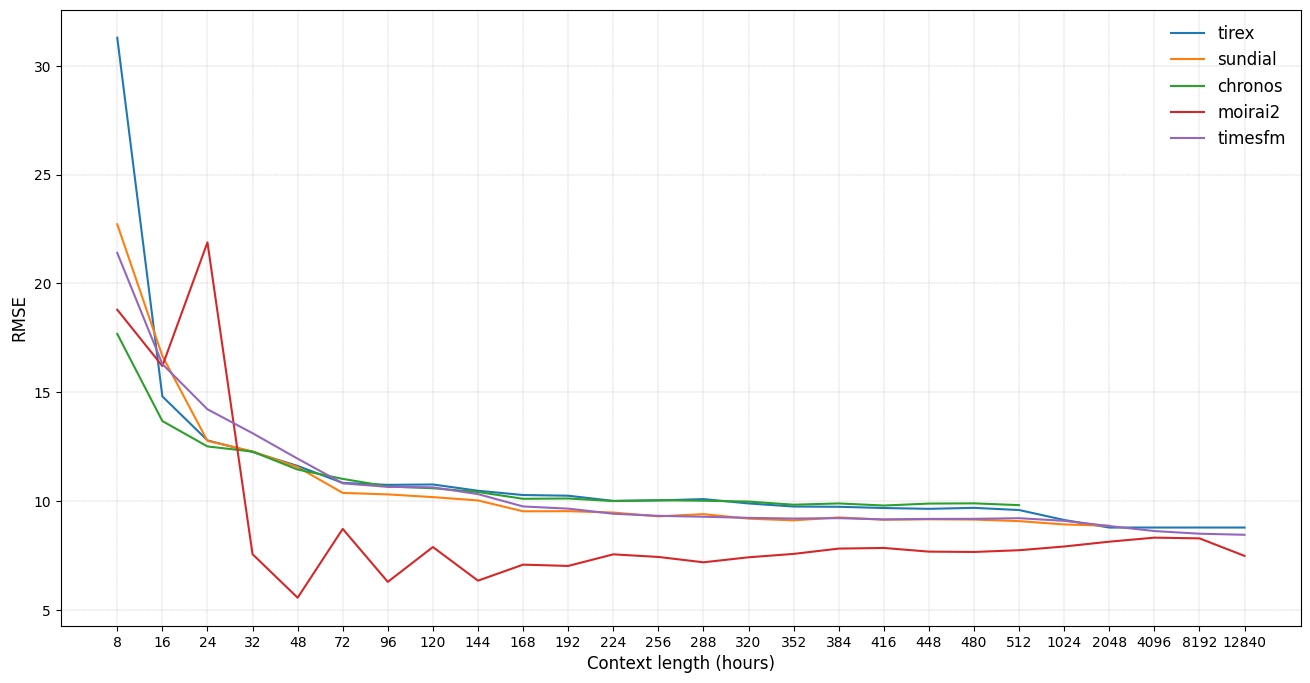

In [95]:
fig, ax = plt.subplots(figsize=(16, 8))

# Sort the DataFrame by the x column to ensure x-values are in order
df_sorted = df.sort_values(by=df.columns[0], key=lambda x: x.astype(int))

# Use the first column as x axis, and plot the rest as y
for i, col in enumerate(df_sorted.columns[1:]):
    # Remove zero values from both x and y for this column
    mask = df_sorted[col] != 0
    x = df_sorted[df_sorted.columns[0]][mask]
    y = df_sorted[col][mask]
    color = plt.cm.tab10(i % 10)  # Use a different color for each line, cycling through tab10 colormap
    ax.plot(x, y, label=col, color=color)

ax.legend(frameon=False, loc=1, fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_xlabel('Context length (hours)', fontsize=12)
ax.grid(lw=.3, ls='--')

plt.savefig(here() / f'output/plots/context_length_rmse-{FS}.jpg', 
            dpi=300, bbox_inches='tight')
plt.show()